# 非線形回帰モデル

- 曲線で予測する

## 回帰で扱うデータ

- 入力（各要素を説明変数または特徴量と呼ぶ） \
m次元のベクトル（$m=1$の場合はスカラー）
\begin{aligned}
\mathbf{x}
  &=
  \left(
    \begin{array}{cccc}
      x_1 & x_2 & \ldots & x_m
    \end{array}
  \right)^T \in \mathbb{R}^m \\[8px]
\end{aligned}

- 出力（目的変数） \
スカラー値
\begin{aligned}
 y \in \mathbb{R}^1
\end{aligned}

※$\mathbb{R}$は、実数全体を表す。 \
※$\mathbb{R}^m$は、m次元の実数である。

## 線形回帰と非線形回帰の違い

- 線形回帰モデル：回帰係数  
- 非線形回帰モデル：回帰関数 \
  回帰関数は、概ね多項式関数やガウス型基底関数を使用される。  

### 基底展開法 
- 回帰関数して、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線形結合を使用 
- 未知パラメータは最小２乗法や最尤法により推定  

\begin{aligned}
y_i &= f( x_i ) + \varepsilon_i \\[8px]
y_i &=  \omega_0 + - \sum _{j=1} ^{m} \omega_j \phi_j(x_i) + \varepsilon_i 
\end{aligned}

$\phi_j(x_i)$の部分は$x$の関数であり、基底関数と呼ばれる。
$w$については線形のまま


## 非線形回帰で扱うデータ

- 説明変数（各要素を説明変数または特徴量と呼ぶ） \
\begin{aligned}
  \mathbf{x}_i
    &=\left(
      \begin{array}{cccc}
        x_{i1} ,& x_{i2}, & \ldots, & x_{im}
      \end{array}
    \right) \in \mathbb{R}^m \\[8px]
\end{aligned}

- 非線形ベクトル
\begin{aligned}
  \phi(x_i) 
    &=\left(
      \begin{array}{cccc}
        \phi_1(x_i) ,& \phi_2(x_i), & \ldots, & \phi_k(x_i)
      \end{array}
    \right)^T \in \mathbb{R}^k \\[8px]
\end{aligned}

- 非線形関数の計画行列
\begin{aligned}
  \boldsymbol{\phi}^{(train)} 
    &=\left(
      \begin{array}{cccc}
        \phi(x_1) ,& \phi(x_2), & \ldots, & \phi(x_n)
      \end{array}
    \right)^T \in \mathbb{R}^{n \times k} \\[8px]
\end{aligned}

$n \times k$の行列

線形回帰：$y=Xw$ 
- $y$は、$n+1$
- $w$は、$(m+1)\times 1$
- $X$は、$n \times (m+1)$

非線形回帰：$y=\phi w$ 
- $y$は、$n+1$
- $w$は、$(m+1)\times 1$
- $\phi$は、$n \times (m+1)$  ←ここだけ、線形回帰と異なる。

※最小化する$w$は、線形回帰と同じ
\begin{aligned}
  \hat{w} &= (X^TX)^{-1}X^Ty \\[8px]
  \Rightarrow & \\[8px]
  \hat{w} &= (\phi^T\phi)^{-1}\phi^Ty \\[8px]
  \hat{y} &= \phi_* \hat{w} \\[8px]
  &= \phi_* (\phi^T\phi)^{-1}\phi^Ty
\end{aligned}

- 最尤法（最小二乗法）による予測値
\begin{aligned}
  \hat{y}  &= \phi^{(train)} (\phi^{(train)T}\phi^{(train)})^{-1}\phi^{(train)T}y^{(train)}
\end{aligned}

### よく使われる基底関数
- 多項式関数
- ガウス型規定関数
- スプライン関数／Bスプライン関数

## 未学習と過学習

#### 学習データに対して十分小さな誤差が得られないモデル　$\rightarrow$　未学習  
- (対策) モデルの表現力が低いため、表現力の高いモデルを利用する。

#### 小さな誤差は得られたけど、テスト集合誤差との差が大きいモデル　$\rightarrow$　過学習(過剰適合)
- (対策１) 学習データの数を増やす。  
- (対策２) 不要な規定関数(変数）を削除して表現を抑止
- (対策３) 正則化法を利用して表現力を抑止

### （対策２）不要な規定関数を削除
- 基底関数の数、位置やバンド幅によりモデルの複雑さが変化
- 解きたい問題に対して、多くの基底関数を用意してしまうと過学習の問題がおこるため、適切な基底関数を用意（CVなどで選択）

### （対策３）正則化　（罰則化法）
- 「モデルの複雑さに伴ってその値が大きくなる正則化項（罰則項）を課した関数」を最小化
- 正則化項（罰則項）の役割
 - 形状によっていくるもの種類があり、それぞれの推定量の性質が異なる。 
 - L2ノルムを利用　⇒　Rdign推定量 ：パラメータを0に近づけるように推定
 - L1ノルムを利用　⇒　Lasso推定量 ：幾つかのパラメータを正確に0に推定(スパース化）
- 正則化（平滑化）パラメータの役割 
 - モデルの曲線お滑らかさを調節　⇒　適切に決める必要あり
 - 小さく　⇒　制約面が大きく
 - 大きく　⇒　制約面が小さく

#### ----正則化法----
予測　
\begin{aligned}
  \hat{y} &= \phi_* \hat{w} \\[8px]
\end{aligned}

$\hat{w}\;$ が大きくなってしまうのは逆行列が計算できない場合 \
例えばのように、２次元行列で$x$軸と平行となる場合
\begin{aligned}
 X = \left(
    \begin{array}{cc}
      1 & 2 \\
      1 & 3 \\
      1 & 4 \\
    \end{array}
  \right)
\end{aligned}

\begin{aligned}
 X = \left(
    \begin{array}{ccc}
      1 & 2 & 4 \\
      1 & 3 & 5.9 \\
      1 & 4 & 8.1 \\
    \end{array}
  \right) \\[8px]
\end{aligned}
$(X^TX)^{-1}$の要素はめちゃくちゃ大きくなる。


\begin{aligned}
\Rightarrow \\[6px]
 E(w) = J(w) + \lambda w^Tw \\[8px]
\end{aligned}

$J(w)$はMSEで、これが小さくなるように考える。 \
$\lambda w^Tw$は、罰則項で、$w$が大きくなると罰則が大きくなる。

## 汎化性能
- 汎化性能：学習に使用した入力(学習データ）だけではなく、それ以外のデータでどれだけ適合できるか。


- 訓練誤差
\begin{aligned}
MSE_{train} =  \frac{1}{n_{train}} \sum _{i=1} ^{n_train} ( \hat y_i^{(train)} - y_i^{(train)} )^2 
\end{aligned}

- テスト誤差
\begin{aligned}
MSE_{test} =  \frac{1}{n_{test}} \sum _{i=1} ^{n_test} ( \hat y_i^{(test)} - y_i^{(test)} )^2 
\end{aligned}

# ハンズオン

#### 多項式関数(１~９次)

\begin{aligned}
\phi_j = x^j
\end{aligned}

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

In [42]:
# データ生成
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z

No handles with labels found to put in legend.


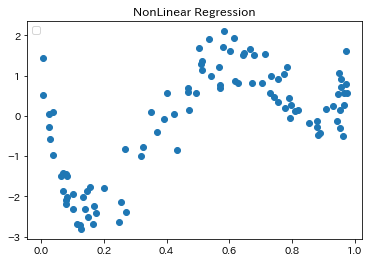

In [44]:
# 真の関数からノイズを伴うデータを生成

## 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

## ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

## ノイズ付きデータを描画
plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

In [47]:
data = data.reshape(-1,1)
target = target.reshape(-1,1)

0.17027087000461616


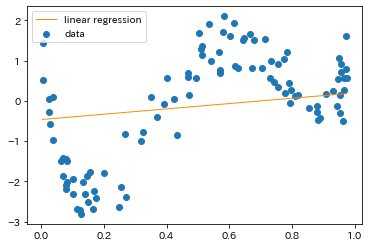

In [48]:

clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

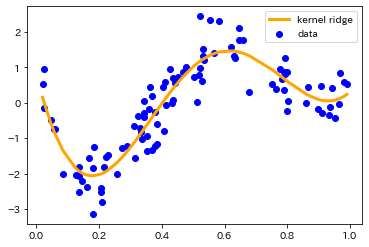

In [40]:
# 多項式関数
clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()

#### ガウス型規定関数

\begin{aligned}
  \phi_j(x) &= exp \left\{
    -\;\frac{(x-\mu_j)^2}{2h_j}
  \right\}　\\[8px]
  &= exp \left\{
    -\;\frac{(x-\mu_j)^2}{\sigma^2}
  \right\}
\end{aligned}

0.809385229473302


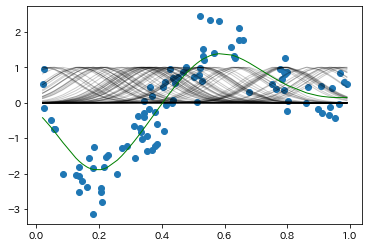

In [41]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

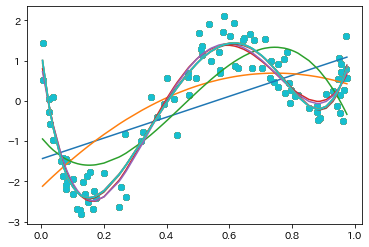

In [50]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

1.1102230246251565e-16


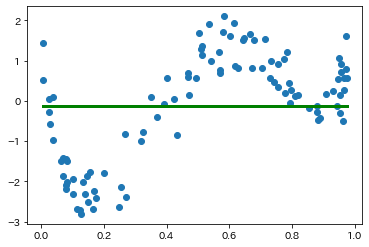

In [51]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

C:\Users\takas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\takas\anaconda3\envs\ml\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


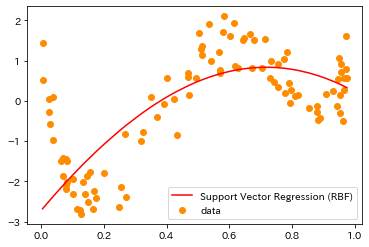

In [52]:
from sklearn import model_selection, preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [64]:
import sys, os
sys.path.append(os.pardir)
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

ローカル環境で実行しているが、同じ

In [65]:

cb_cp = ModelCheckpoint('out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='out/tensorBoard', histogram_freq=0)

In [71]:
# モデルの定義
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [68]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# モデルを実行する
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

C:\Users\takas\AppData\Local\Temp/ipykernel_15292/3939401307.py:6: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)


Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 1.6995
Epoch 00001: saving model to out/checkpoints\weights.01-1.46.hdf5
18/18 [==============================] - 1s 20ms/step - loss: 1.6995 - val_loss: 1.4617
Epoch 2/100
17/18 [===========================>..] - ETA: 0s - loss: 1.0623
Epoch 00002: saving model to out/checkpoints\weights.02-1.18.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 1.0449 - val_loss: 1.1850
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 1.0411
Epoch 00003: saving model to out/checkpoints\weights.03-1.06.hdf5
18/18 [==============================] - 0s 17ms/step - loss: 1.0538 - val_loss: 1.0568
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 0.7618
Epoch 00004: saving model to out/checkpoints\weights.04-0.65.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.7697 - val_loss: 0.6478
Epoch 5/100
17/18 [===========================>..] - ETA: 0s - loss: 0.8920
Epoc

18/18 [==============================] - 0s 23ms/step - loss: 0.4309 - val_loss: 0.3608
Epoch 37/100
18/18 [==============================] - ETA: 0s - loss: 0.4221
Epoch 00037: saving model to out/checkpoints\weights.37-0.29.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.4221 - val_loss: 0.2924
Epoch 38/100
14/18 [======================>.......] - ETA: 0s - loss: 0.2900
Epoch 00038: saving model to out/checkpoints\weights.38-0.31.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.3325 - val_loss: 0.3087
Epoch 39/100
14/18 [======================>.......] - ETA: 0s - loss: 0.3230
Epoch 00039: saving model to out/checkpoints\weights.39-0.30.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.3536 - val_loss: 0.3032
Epoch 40/100
15/18 [========================>.....] - ETA: 0s - loss: 0.3204
Epoch 00040: saving model to out/checkpoints\weights.40-0.37.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.3223 - val_l

17/18 [===========================>..] - ETA: 0s - loss: 0.3328
Epoch 00072: saving model to out/checkpoints\weights.72-0.28.hdf5
18/18 [==============================] - 0s 17ms/step - loss: 0.3257 - val_loss: 0.2763
Epoch 73/100
18/18 [==============================] - ETA: 0s - loss: 0.4511
Epoch 00073: saving model to out/checkpoints\weights.73-0.66.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.4511 - val_loss: 0.6603
Epoch 74/100
18/18 [==============================] - ETA: 0s - loss: 0.4629
Epoch 00074: saving model to out/checkpoints\weights.74-0.25.hdf5
18/18 [==============================] - 0s 28ms/step - loss: 0.4629 - val_loss: 0.2473
Epoch 75/100
17/18 [===========================>..] - ETA: 0s - loss: 0.3207
Epoch 00075: saving model to out/checkpoints\weights.75-0.30.hdf5
18/18 [==============================] - 0s 16ms/step - loss: 0.3394 - val_loss: 0.3011
Epoch 76/100
14/18 [======================>.......] - ETA: 0s - loss: 0.3349
Epoch 00076:

In [69]:
# 予測する
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 2ms/step


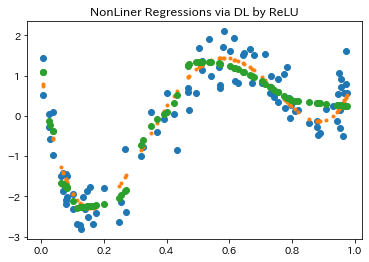

In [70]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [72]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
